In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/newlabel.csv
/kaggle/input/data.csv


In [2]:
df1 = pd.read_csv("/kaggle/input/data.csv")
df2 = pd.read_csv("/kaggle/input/newlabel.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [4]:
df1.isnull().sum()

Unnamed: 0    0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20532, dtype: int64

In [5]:
df2.head()

,Label
0,4
1,3
2,4
3,4
4,0


In [6]:
df1.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [7]:
df1 =  df1.drop(['Unnamed: 0'],axis = 1)

In [8]:
df1.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [9]:
df = pd.concat([df1,df2],axis = 1)

In [10]:
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Label
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,4
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,3
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,4
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,4
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,0


In [11]:
column = df1.columns

In [12]:
column

Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9',
       ...
       'gene_20521', 'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525',
       'gene_20526', 'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530'],
      dtype='object', length=20531)

In [13]:
c = pd.DataFrame(df1.sum(axis = 1),columns = ['Count'])

In [14]:
c.head()

,Count
0,133742.948913
1,128864.130049
2,122275.042327
3,129258.153464
4,131890.743464


In [15]:
C = c.median()

In [16]:
print(C)

Count    132618.290334
dtype: float64


In [17]:
c = np.array(c)

In [18]:
print(c)

[[133742.94891336]
 [128864.13004939]
 [122275.04232661]
 [129258.15346373]
 [131890.74346439]
 [134559.98822865]
 [133179.54897212]
 [134642.85566572]
 [132273.92181321]
 [129498.48287659]
 [133886.23959305]
 [134148.26123825]
 [136476.99209907]
 [127187.20695499]
 [127481.10298253]
 [132637.95081801]
 [134681.77588822]
 [134506.47946558]
 [133286.11867309]
 [132382.41000023]
 [126891.08797649]
 [129424.83225596]
 [133528.57745531]
 [124605.68709341]
 [128646.73159305]
 [137547.57677246]
 [128491.67879181]
 [128862.13288782]
 [134123.12858292]
 [133256.75647254]
 [129374.54201229]
 [125879.37634888]
 [131656.61446423]
 [133579.36968935]
 [133617.26581152]
 [127054.43739667]
 [133534.8665014 ]
 [139017.2372436 ]
 [132932.38015794]
 [133432.5084621 ]
 [133172.02470105]
 [131888.16915971]
 [136407.94315361]
 [132555.43370948]
 [132660.52417183]
 [130376.865797  ]
 [131626.43940682]
 [125492.51282119]
 [131461.15407706]
 [134300.49153816]
 [129067.74186849]
 [129708.64012882]
 [128832.279

In [19]:
df1.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [20]:
train = df1.transpose()

In [21]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
gene_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.436588,0.000000,0.000000,0.000000,0.000000,0.000000
gene_1,2.017209,0.592732,3.511759,3.663618,2.655741,3.467853,1.224966,2.854853,3.992125,3.642494,...,3.080061,4.337404,2.068224,4.288388,4.472176,1.865642,3.942955,3.249582,2.590339,2.325242
gene_2,3.265527,1.588421,4.327199,4.507649,2.821547,3.581918,1.691177,1.750478,2.772730,4.423558,...,2.815739,2.597126,0.857663,3.452490,4.908746,2.718197,4.453807,3.707492,2.787976,3.805932
gene_3,5.478487,7.586157,6.881787,6.659068,6.539454,6.620243,6.572007,7.226720,6.546692,6.849511,...,6.209617,6.070379,6.218739,7.209151,5.937848,7.350099,6.346597,8.185901,7.318624,6.530246
gene_4,10.431999,9.623011,9.870730,10.196184,9.738265,9.706829,9.640511,9.758691,10.488252,9.464466,...,9.644469,9.863990,10.623068,9.875620,9.330901,10.006003,10.056868,9.504082,9.987136,9.560367


In [22]:
train.columns

RangeIndex(start=0, stop=801, step=1)

In [23]:
train[0]

gene_0         0.000000
gene_1         2.017209
gene_2         3.265527
gene_3         5.478487
gene_4        10.431999
                ...    
gene_20526    12.003135
gene_20527     9.650743
gene_20528     8.921326
gene_20529     5.286759
gene_20530     0.000000
Name: 0, Length: 20531, dtype: float64

In [24]:
x = []
for i in range(801):
    x.append(C/c[i])

In [25]:
print(x)

[Count    0.991591
dtype: float64, Count    1.029133
dtype: float64, Count    1.08459
dtype: float64, Count    1.025996
dtype: float64, Count    1.005516
dtype: float64, Count    0.98557
dtype: float64, Count    0.995786
dtype: float64, Count    0.984963
dtype: float64, Count    1.002603
dtype: float64, Count    1.024091
dtype: float64, Count    0.99053
dtype: float64, Count    0.988595
dtype: float64, Count    0.971726
dtype: float64, Count    1.042701
dtype: float64, Count    1.040298
dtype: float64, Count    0.999852
dtype: float64, Count    0.984679
dtype: float64, Count    0.985962
dtype: float64, Count    0.99499
dtype: float64, Count    1.001782
dtype: float64, Count    1.045135
dtype: float64, Count    1.024674
dtype: float64, Count    0.993183
dtype: float64, Count    1.064304
dtype: float64, Count    1.030872
dtype: float64, Count    0.964163
dtype: float64, Count    1.032116
dtype: float64, Count    1.029149
dtype: float64, Count    0.98878
dtype: float64, Count    0.995209


In [26]:
for i in range(0,50):
    train[i] = train[i].map(lambda k : k * x[i])
    train[i] = train[i].map(lambda k : 2 * math.sqrt(k))

In [27]:
for i in range(50,100):
    train[i] = train[i].map(lambda k : k * x[i])
    train[i] = train[i].map(lambda k : 2 * math.sqrt(k))

In [28]:
for i in range(100,150):
    train[i] = train[i].map(lambda k : k * x[i]) 
    train[i] = train[i].map(lambda k : 2 * math.sqrt(k))

In [29]:
for i in range(150,200):
    train[i] = train[i].map(lambda k : k * x[i])
    train[i] = train[i].map(lambda k : 2 * math.sqrt(k))

In [30]:
for i in range(200,250):
    train[i] = train[i].map(lambda k : k * x[i])
    train[i] = train[i].map(lambda k : 2 * math.sqrt(k))

In [31]:
for i in range(250,300):
    train[i] = train[i].map(lambda k : k * x[i])
    train[i] = train[i].map(lambda k : 2 * math.sqrt(k))

In [32]:
for i in range(300,350):
    train[i] = train[i].map(lambda k : k * x[i])
    train[i] = train[i].map(lambda k : 2 * math.sqrt(k))

In [33]:
for i in range(350,400):
    train[i] = train[i].map(lambda k : k * x[i])
    train[i] = train[i].map(lambda k : 2 * math.sqrt(k))

In [34]:
for i in range(400,450):
    train[i] = train[i].map(lambda k : k * x[i])
    train[i] = train[i].map(lambda k : 2 * math.sqrt(k))

In [35]:
for i in range(450,500):
    train[i] = train[i].map(lambda k : k * x[i])
    train[i] = train[i].map(lambda k : 2 * math.sqrt(k))

In [36]:
for i in range(500,550):
    train[i] = train[i].map(lambda k : k * x[i])
    train[i] = train[i].map(lambda k : 2 * math.sqrt(k))

In [37]:
for i in range(550,600):
    train[i] = train[i].map(lambda k : k * x[i])
    train[i] = train[i].map(lambda k : 2 * math.sqrt(k))

In [38]:
for i in range(600,650):
    train[i] = train[i].map(lambda k : k * x[i])
    train[i] = train[i].map(lambda k : 2 * math.sqrt(k))

In [39]:
for i in range(650,700):
    train[i] = train[i].map(lambda k : k * x[i])
    train[i] = train[i].map(lambda k : 2 * math.sqrt(k))

In [40]:
for i in range(700,750):
    train[i] = train[i].map(lambda k : k * x[i])
    train[i] = train[i].map(lambda k : 2 * math.sqrt(k))

In [41]:
for i in range(750,801):
    train[i] = train[i].map(lambda k : k * x[i])
    train[i] = train[i].map(lambda k : 2 * math.sqrt(k))

In [42]:
train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
gene_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.310257,0.000000,0.000000,0.000000,0.000000,0.000000
gene_1,2.828601,1.562050,3.903239,3.877554,3.268266,3.697465,2.208895,3.353760,4.001259,3.862769,...,3.536809,4.267447,2.925219,4.149140,4.193530,2.769580,3.971386,3.445022,3.193634,3.026544
gene_2,3.598926,2.557104,4.332776,4.301082,3.368745,3.757782,2.595419,2.626143,3.334636,4.256819,...,3.381647,3.302172,1.883727,3.722865,4.393449,3.343030,4.220821,3.679750,3.313229,3.872072
gene_3,4.661509,5.588260,5.464034,5.227686,5.128558,5.108704,5.116370,5.335937,5.123958,5.296990,...,5.021858,5.048485,5.072368,5.379639,4.832088,5.497262,5.038505,5.467785,5.368113,5.071982
gene_4,6.432503,6.293919,6.543912,6.468768,6.258429,6.186036,6.196735,6.200630,6.485540,6.226549,...,6.258513,6.435458,6.629558,6.296414,6.057342,6.414018,6.342531,5.891601,6.270865,6.136916
gene_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gene_6,5.334731,5.297025,5.499783,5.673541,5.139336,5.530481,5.187069,4.842563,5.553465,5.705673,...,5.079098,5.457991,5.239020,5.425547,5.341182,5.273842,5.411237,5.246451,6.023077,5.598715
gene_7,1.532180,0.000000,1.401257,1.335944,1.204946,0.000000,1.455509,0.000000,1.188653,1.722395,...,0.000000,2.308722,1.807155,1.293755,1.298982,1.429368,0.000000,2.571873,0.000000,0.000000
gene_8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gene_9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.038908,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
X_train = train.transpose()

In [44]:
X_train.head(10)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.828601,3.598926,4.661509,6.432503,0.0,5.334731,1.532180,0.0,0.000000,...,4.420535,5.706563,6.210233,5.351380,6.014357,6.899913,6.186950,5.948548,4.579215,0.0
1,0.0,1.562050,2.557104,5.588260,6.293919,0.0,5.297025,0.000000,0.0,0.000000,...,4.348420,5.490803,6.332365,5.074981,5.873939,7.223239,6.579802,6.219852,2.936104,0.0
2,0.0,3.903239,4.332776,5.464034,6.543912,0.0,5.499783,1.401257,0.0,0.000000,...,4.715402,5.937877,6.879361,4.840879,6.557444,6.264309,6.516550,6.616350,2.702140,0.0
3,0.0,3.877554,4.301082,5.227686,6.468768,0.0,5.673541,1.335944,0.0,0.000000,...,4.993808,6.007175,6.451404,6.058144,6.277196,6.837790,6.307721,6.304321,3.675638,0.0
4,0.0,3.268266,3.368745,5.128558,6.258429,0.0,5.139336,1.204946,0.0,0.000000,...,4.910848,5.980125,6.459416,5.374300,6.293244,6.924798,6.088874,6.168754,4.533679,0.0
5,0.0,3.697465,3.757782,5.108704,6.186036,0.0,5.530481,0.000000,0.0,0.000000,...,4.751430,5.823556,6.256220,4.902321,6.220726,6.749882,6.036806,6.227209,4.594718,0.0
6,0.0,2.208895,2.595419,5.116370,6.196735,0.0,5.187069,1.455509,0.0,0.000000,...,4.509717,5.619451,6.207478,2.734835,6.248642,7.266414,6.204436,6.068035,5.760487,0.0
7,0.0,3.353760,2.626143,5.335937,6.200630,0.0,4.842563,0.000000,0.0,0.000000,...,4.568664,5.710563,6.149761,4.545518,6.275049,7.065369,6.272974,6.026037,5.080542,0.0
8,0.0,4.001259,3.334636,5.123958,6.485540,0.0,5.553465,1.188653,0.0,4.038908,...,5.192100,6.204037,6.257531,5.640543,6.627638,7.079960,6.455077,6.455170,5.603107,0.0
9,0.0,3.862769,4.256819,5.296990,6.226549,0.0,5.705673,1.722395,0.0,0.000000,...,4.965917,5.974182,6.482670,5.011707,6.375784,6.756560,6.153884,6.233070,4.415339,0.0


In [45]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [46]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
ex_var = pca.explained_variance_ratio_


In [47]:
ex_var

array([0.13377837, 0.08900826])

In [48]:
X_train

array([[-32.488212  , -33.7969339 ],
       [  0.24984093,  43.72423899],
       [-26.40873441,   8.82637022],
       ...,
       [  6.290713  ,  14.16657839],
       [-25.11221278, -32.22292463],
       [-26.15885333, -18.14150504]])

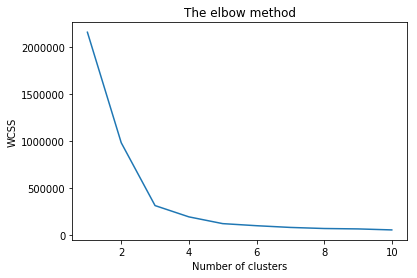

In [49]:
wcss = []

for i in range(1, 11):
    kmean = KMeans(n_clusters = i, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
    kmean.fit(X_train)
    wcss.append(kmean.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')      #within cluster sum of squares
plt.show()


In [50]:
def dist_func(x,y):
    
    ans = 0
    for i in range(len(x)-1):
        ans += pow(x[i] - y[i],2)
        
    return math.sqrt(ans)

In [51]:
def kmeans(ds,centroid,k):
    
    max_iter = 100
    
    for i in range(max_iter):
        
        d = {}
        for i in range(k):
            d[i]=[]
            
        d1 = {}
        for i in range(k):
            d1[i]=[]
            
        for j in range(len(ds)):
            l= []
                
            for m in centroid:
                
                l.append(dist_func(m,ds[j]))
                
            d[l.index(min(l))].append(ds[j])
            
            
        
        for z in d:
            centroid[z] = np.average(d[z],axis = 0)
            
        
        
    return d


In [52]:
def rec_kmeans(ds):
    
    
    li = set()
        
    for j in ds:
        
        if(j[2] != -1):
            li.add(j[2])
        
        
    
    if(len(li) == 1):
        final_clusters.append(ds)
        cluster_label.append(li)
        return

    
    if(len(li) == 0):
        final_clusters.append(ds)
        cluster_label.append(-1)
        return
    
    
    
            
    
    newk = len(li)
    centroid = []
    
    for i in range(newk):
        centroid.append(ds[i])
    
    r = kmeans(ds,centroid,newk)
    
    for z in r:
        z1 = r[z]
        rec_kmeans(z1)
    


In [53]:
k = 5

X_train = pd.DataFrame(X_train)
y = df['Label']
X1 = pd.concat([X_train,y],axis = 1)



In [54]:
X1.shape

(801, 3)

In [55]:
X_training = X1.iloc[:,[0,1,2]].values

final_clusters = []
cluster_label = []
centr = []
for i in range(k):
        centr.append(X_training[i])
    


#initial Kmeans call  
res = kmeans(X_training,centr,k)

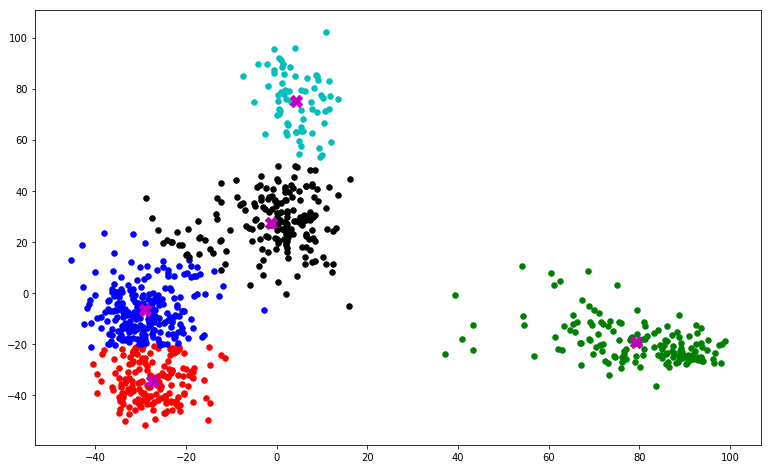

In [56]:
colors = ["r", "g", "c", "b", "k"]
labl = [0, 1, 2, 3, 4]


plt.figure(figsize = (13,8))
for c in res:
	color = colors[c]
	for features in res[c]:
		plt.scatter(features[0], features[1], color = color ,s = 30)


for c in centr:
    plt.scatter(c[0],c[1],marker = 'X',s = 150 ,color = 'm')
        

plt.show()

In [57]:
#recursive Kmeans call for every partition in res
for par in res:
    pi = res[par]
    rec_kmeans(pi)


In [58]:
#calculating final centroids
final_centroids = []
for i in final_clusters:
    final_centroids.append(np.average(i,axis = 0))




In [59]:
len(final_clusters)

117

In [60]:
len(cluster_label)

117

In [61]:
dtf = [f'cluster{i}' for i in range(1,len(final_clusters) + 1)]
results = pd.DataFrame(dtf,columns = ['Clusters'])
no_of_points = []
labelled = []
unlabelled = []

cluster_lbl = []
results

,Clusters
0,cluster1
1,cluster2
2,cluster3
3,cluster4
4,cluster5
...,...
112,cluster113
113,cluster114
114,cluster115
115,cluster116


In [62]:
for i in cluster_label:
    if( i != -1):
        cluster_lbl.append(int(list(i)[0]))
    else:
        cluster_lbl.append(i)

In [63]:
results['Label'] = cluster_lbl  

In [64]:
results

,Clusters,Label
0,cluster1,4
1,cluster2,4
2,cluster3,0
3,cluster4,-1
4,cluster5,-1
...,...,...
112,cluster113,3
113,cluster114,3
114,cluster115,1
115,cluster116,3


In [65]:
len(final_clusters)

117

In [66]:
for i in range(len(final_clusters)):
    no_of_points.append(len(final_clusters[i]))
    cl = 0
    cu = 0
    for j in final_clusters[i]:
        if(j[2] == -1):
            cu += 1
        else:
            cl += 1
    
    labelled.append(cl)
    unlabelled.append(cu)

    
    


In [67]:
len(no_of_points)

117

In [68]:
len(labelled)

117

In [69]:
len(unlabelled)

117

In [70]:
results['Total_no_of_data'] = no_of_points
results['No_of_ld'] = labelled
results['No_of_ud'] = unlabelled

In [71]:
print(results)

       Clusters  Label  Total_no_of_data  No_of_ld  No_of_ud
0      cluster1      4                95        80        15
1      cluster2      4                 1         1         0
2      cluster3      0                 1         1         0
3      cluster4     -1                 1         0         1
4      cluster5     -1                 1         0         1
..          ...    ...               ...       ...       ...
112  cluster113      3                 3         2         1
113  cluster114      3                 1         1         0
114  cluster115      1                 1         1         0
115  cluster116      3                 1         1         0
116  cluster117      3                 3         3         0

[117 rows x 5 columns]
